In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import os
path = os.getcwd()

In [40]:
train = pd.read_csv(path+"\\train.csv")
test = pd.read_csv(path+"\\test.csv")
sample_sub = pd.read_csv(path+"\\sample_submission.csv")

In [41]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)
df.shape

(219057, 14)

In [42]:
df['Type_of_Cab'].fillna('F', inplace = True)
df['Customer_Since_Months'].fillna(10, inplace = True)
mean_life = df['Life_Style_Index'].mean()
df['Life_Style_Index'].fillna(mean_life, inplace = True)
df['Confidence_Life_Style_Index'].fillna('D', inplace = True)
mean_var1 = df['Var1'].mean()
df['Var1'].fillna(mean_var1, inplace = True)

In [43]:
df.fillna(-999, inplace = True)
# Encoding
df = pd.get_dummies(data = df, columns=['Type_of_Cab','Destination_Type'], drop_first=True)
df['Confidence_Life_Style_Index'].replace({'A':3, 'B':2, 'C': 1, 'D': 0}, inplace = True)
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

# Data type Changing
df['Trip_Distance'] = df['Trip_Distance'].astype('float16')
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('int8')
df['Life_Style_Index'] = df['Life_Style_Index'].astype('float16')
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].astype('int16')
df['Customer_Rating'] = df['Customer_Rating'].astype('float16')
df['Var1'] = df['Var1'].astype('int16')
df['Var2'] = df['Var2'].astype('uint8')
df['Var3'] = df['Var3'].astype('uint8')
#df['Surge_Pricing_Type'] = df['Surge_Pricing_Type'].astype('uint8')

In [44]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)

In [45]:
target = 'Surge_Pricing_Type'
id_col = 'Trip_ID'

features = [col for col in df.columns if col not in ([target, id_col])]

In [46]:
trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999, stratify = train_proc[target])

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]


In [92]:
%%time
cat = CatBoostClassifier(random_state=1999)

cat.fit(X_trn, y_trn)

preds = cat.predict(X_val)

accuracy = accuracy_score(y_val, preds)
print(f'mean_squared_log_error is : {accuracy}')

Learning rate set to 0.10034
0:	learn: 1.0369508	total: 17.8ms	remaining: 17.8s
1:	learn: 0.9891731	total: 34.6ms	remaining: 17.3s
2:	learn: 0.9506296	total: 51.3ms	remaining: 17s
3:	learn: 0.9198021	total: 68.8ms	remaining: 17.1s
4:	learn: 0.8946584	total: 85.2ms	remaining: 17s
5:	learn: 0.8733237	total: 102ms	remaining: 16.9s
6:	learn: 0.8570440	total: 119ms	remaining: 16.9s
7:	learn: 0.8417273	total: 136ms	remaining: 16.8s
8:	learn: 0.8289017	total: 152ms	remaining: 16.7s
9:	learn: 0.8179156	total: 168ms	remaining: 16.6s
10:	learn: 0.8087589	total: 188ms	remaining: 16.9s
11:	learn: 0.8006062	total: 209ms	remaining: 17.2s
12:	learn: 0.7937677	total: 228ms	remaining: 17.3s
13:	learn: 0.7875532	total: 246ms	remaining: 17.3s
14:	learn: 0.7820274	total: 263ms	remaining: 17.3s
15:	learn: 0.7770463	total: 280ms	remaining: 17.2s
16:	learn: 0.7727877	total: 296ms	remaining: 17.1s
17:	learn: 0.7692467	total: 313ms	remaining: 17.1s
18:	learn: 0.7657772	total: 330ms	remaining: 17s
19:	learn: 0.

168:	learn: 0.6861107	total: 3.43s	remaining: 16.9s
169:	learn: 0.6860179	total: 3.45s	remaining: 16.9s
170:	learn: 0.6858878	total: 3.47s	remaining: 16.8s
171:	learn: 0.6857444	total: 3.5s	remaining: 16.8s
172:	learn: 0.6856454	total: 3.51s	remaining: 16.8s
173:	learn: 0.6855734	total: 3.53s	remaining: 16.8s
174:	learn: 0.6854682	total: 3.55s	remaining: 16.7s
175:	learn: 0.6853415	total: 3.57s	remaining: 16.7s
176:	learn: 0.6851909	total: 3.59s	remaining: 16.7s
177:	learn: 0.6851088	total: 3.61s	remaining: 16.7s
178:	learn: 0.6850137	total: 3.63s	remaining: 16.7s
179:	learn: 0.6849314	total: 3.65s	remaining: 16.6s
180:	learn: 0.6848032	total: 3.67s	remaining: 16.6s
181:	learn: 0.6846701	total: 3.69s	remaining: 16.6s
182:	learn: 0.6845430	total: 3.72s	remaining: 16.6s
183:	learn: 0.6844019	total: 3.74s	remaining: 16.6s
184:	learn: 0.6842932	total: 3.76s	remaining: 16.6s
185:	learn: 0.6841420	total: 3.78s	remaining: 16.5s
186:	learn: 0.6840209	total: 3.8s	remaining: 16.5s
187:	learn: 0.

336:	learn: 0.6713853	total: 6.4s	remaining: 12.6s
337:	learn: 0.6713119	total: 6.42s	remaining: 12.6s
338:	learn: 0.6712237	total: 6.44s	remaining: 12.6s
339:	learn: 0.6711461	total: 6.46s	remaining: 12.5s
340:	learn: 0.6710844	total: 6.47s	remaining: 12.5s
341:	learn: 0.6710539	total: 6.49s	remaining: 12.5s
342:	learn: 0.6709835	total: 6.5s	remaining: 12.5s
343:	learn: 0.6709173	total: 6.52s	remaining: 12.4s
344:	learn: 0.6708624	total: 6.54s	remaining: 12.4s
345:	learn: 0.6707878	total: 6.55s	remaining: 12.4s
346:	learn: 0.6707343	total: 6.57s	remaining: 12.4s
347:	learn: 0.6706372	total: 6.59s	remaining: 12.3s
348:	learn: 0.6705807	total: 6.61s	remaining: 12.3s
349:	learn: 0.6705000	total: 6.63s	remaining: 12.3s
350:	learn: 0.6704764	total: 6.64s	remaining: 12.3s
351:	learn: 0.6704054	total: 6.66s	remaining: 12.3s
352:	learn: 0.6703189	total: 6.67s	remaining: 12.2s
353:	learn: 0.6702555	total: 6.69s	remaining: 12.2s
354:	learn: 0.6701888	total: 6.71s	remaining: 12.2s
355:	learn: 0.

504:	learn: 0.6612584	total: 9.2s	remaining: 9.02s
505:	learn: 0.6612354	total: 9.22s	remaining: 9s
506:	learn: 0.6611991	total: 9.23s	remaining: 8.98s
507:	learn: 0.6611352	total: 9.25s	remaining: 8.96s
508:	learn: 0.6611270	total: 9.26s	remaining: 8.93s
509:	learn: 0.6610522	total: 9.28s	remaining: 8.91s
510:	learn: 0.6610296	total: 9.29s	remaining: 8.89s
511:	learn: 0.6609789	total: 9.31s	remaining: 8.87s
512:	learn: 0.6609343	total: 9.33s	remaining: 8.85s
513:	learn: 0.6608825	total: 9.34s	remaining: 8.83s
514:	learn: 0.6608479	total: 9.36s	remaining: 8.81s
515:	learn: 0.6607958	total: 9.38s	remaining: 8.79s
516:	learn: 0.6607644	total: 9.39s	remaining: 8.77s
517:	learn: 0.6606875	total: 9.41s	remaining: 8.75s
518:	learn: 0.6606369	total: 9.43s	remaining: 8.73s
519:	learn: 0.6605796	total: 9.44s	remaining: 8.72s
520:	learn: 0.6604863	total: 9.46s	remaining: 8.7s
521:	learn: 0.6604525	total: 9.48s	remaining: 8.68s
522:	learn: 0.6603832	total: 9.49s	remaining: 8.66s
523:	learn: 0.660

669:	learn: 0.6528186	total: 12s	remaining: 5.89s
670:	learn: 0.6527734	total: 12s	remaining: 5.87s
671:	learn: 0.6527181	total: 12s	remaining: 5.85s
672:	learn: 0.6526746	total: 12s	remaining: 5.83s
673:	learn: 0.6526189	total: 12s	remaining: 5.82s
674:	learn: 0.6525850	total: 12s	remaining: 5.8s
675:	learn: 0.6525480	total: 12.1s	remaining: 5.78s
676:	learn: 0.6524710	total: 12.1s	remaining: 5.76s
677:	learn: 0.6524068	total: 12.1s	remaining: 5.74s
678:	learn: 0.6523571	total: 12.1s	remaining: 5.72s
679:	learn: 0.6522748	total: 12.1s	remaining: 5.71s
680:	learn: 0.6522299	total: 12.2s	remaining: 5.69s
681:	learn: 0.6521969	total: 12.2s	remaining: 5.67s
682:	learn: 0.6521655	total: 12.2s	remaining: 5.66s
683:	learn: 0.6521253	total: 12.2s	remaining: 5.64s
684:	learn: 0.6520712	total: 12.2s	remaining: 5.62s
685:	learn: 0.6520165	total: 12.2s	remaining: 5.61s
686:	learn: 0.6519690	total: 12.3s	remaining: 5.59s
687:	learn: 0.6519097	total: 12.3s	remaining: 5.57s
688:	learn: 0.6518682	tot

835:	learn: 0.6447652	total: 14.8s	remaining: 2.9s
836:	learn: 0.6447334	total: 14.8s	remaining: 2.88s
837:	learn: 0.6446746	total: 14.8s	remaining: 2.86s
838:	learn: 0.6446167	total: 14.8s	remaining: 2.84s
839:	learn: 0.6445676	total: 14.8s	remaining: 2.83s
840:	learn: 0.6445336	total: 14.8s	remaining: 2.81s
841:	learn: 0.6444992	total: 14.9s	remaining: 2.79s
842:	learn: 0.6444785	total: 14.9s	remaining: 2.77s
843:	learn: 0.6444499	total: 14.9s	remaining: 2.75s
844:	learn: 0.6443884	total: 14.9s	remaining: 2.73s
845:	learn: 0.6443530	total: 14.9s	remaining: 2.72s
846:	learn: 0.6443057	total: 14.9s	remaining: 2.7s
847:	learn: 0.6442360	total: 15s	remaining: 2.68s
848:	learn: 0.6441942	total: 15s	remaining: 2.66s
849:	learn: 0.6441604	total: 15s	remaining: 2.65s
850:	learn: 0.6441177	total: 15s	remaining: 2.63s
851:	learn: 0.6440613	total: 15s	remaining: 2.61s
852:	learn: 0.6440157	total: 15s	remaining: 2.59s
853:	learn: 0.6439867	total: 15.1s	remaining: 2.57s
854:	learn: 0.6439351	tota

994:	learn: 0.6375970	total: 17.6s	remaining: 88.7ms
995:	learn: 0.6375635	total: 17.7s	remaining: 70.9ms
996:	learn: 0.6375286	total: 17.7s	remaining: 53.2ms
997:	learn: 0.6375005	total: 17.7s	remaining: 35.5ms
998:	learn: 0.6374416	total: 17.7s	remaining: 17.7ms
999:	learn: 0.6374184	total: 17.7s	remaining: 0us
mean_squared_log_error is : 0.7063760300763301
Wall time: 18.3 s


In [93]:
test_preds = cat.predict(X_test)
sample_sub[target] = test_preds
sample_sub.to_csv(path+'\\baseline_model_preds.csv', index = False)

In [91]:
test_preds

array([1., 2., 2., ..., 1., 2., 2.])

In [103]:
def cross_val(features, train, test, clf, name):
    N_splits = 5
    
    ## Aggregating Predictions Prerequsities
    preds_df = pd.DataFrame()
    ####
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    
    feature_importance = pd.DataFrame()
    
    target_col = train[target]
    
    feature_importance_list = 0
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state = 1999)
    stratified_target = pd.qcut(target_col, 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
        print()
        print(f'*************************Fold {index+1}*************************')
        
        ## Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        ## Validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ## Test Set
        X_test = test[features]
        
        
        ## Model Training
        _ = clf.fit(X_trn, y_trn)
        
        ## Predicting
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
        accuracy = accuracy_score(y_val, val_preds)
        print()
        print(f'Accuracy is: {accuracy}')
        
        if name == 'cat':
            a = pd.DataFrame(val_preds)
            b = a[0]
            oofs[val_idx] = b
            
            a = pd.DataFrame(test_preds)
            b = a[0]
            preds_df[str(index+1)] = b
        else:
            oofs[val_idx] = val_preds
            #preds += test_preds
            preds_df[str(index+1)] = test_preds
        
        feature_importance_list +=  clf.feature_importances_
    total_accuracy = accuracy_score(target_col, oofs)
    print()
    print(f'Accuracy is: {total_accuracy}')
    
    feature_importance['Features'] = features
    feature_importance['Importances'] = feature_importance_list/5
    
    ## Aggregating Predictions
    preds_df['Mode'] = preds_df.apply(lambda x: x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds, feature_importance


*************************Fold 1*************************
Learning rate set to 0.10034
0:	learn: 1.0368904	total: 18.4ms	remaining: 18.4s
1:	learn: 0.9891587	total: 35ms	remaining: 17.5s
2:	learn: 0.9506718	total: 51.7ms	remaining: 17.2s
3:	learn: 0.9195404	total: 79.1ms	remaining: 19.7s
4:	learn: 0.8943362	total: 96.5ms	remaining: 19.2s
5:	learn: 0.8730580	total: 113ms	remaining: 18.7s
6:	learn: 0.8554319	total: 129ms	remaining: 18.3s
7:	learn: 0.8414788	total: 147ms	remaining: 18.2s
8:	learn: 0.8284982	total: 163ms	remaining: 18s
9:	learn: 0.8174668	total: 180ms	remaining: 17.8s
10:	learn: 0.8080612	total: 196ms	remaining: 17.6s
11:	learn: 0.8002216	total: 212ms	remaining: 17.5s
12:	learn: 0.7931683	total: 229ms	remaining: 17.4s
13:	learn: 0.7871579	total: 246ms	remaining: 17.3s
14:	learn: 0.7815100	total: 263ms	remaining: 17.3s
15:	learn: 0.7770155	total: 282ms	remaining: 17.3s
16:	learn: 0.7724310	total: 301ms	remaining: 17.4s
17:	learn: 0.7686988	total: 320ms	remaining: 17.4s
18:	

168:	learn: 0.6865499	total: 3.07s	remaining: 15.1s
169:	learn: 0.6864362	total: 3.08s	remaining: 15.1s
170:	learn: 0.6863422	total: 3.1s	remaining: 15s
171:	learn: 0.6862170	total: 3.12s	remaining: 15s
172:	learn: 0.6861364	total: 3.13s	remaining: 15s
173:	learn: 0.6860267	total: 3.15s	remaining: 15s
174:	learn: 0.6859086	total: 3.17s	remaining: 14.9s
175:	learn: 0.6858395	total: 3.18s	remaining: 14.9s
176:	learn: 0.6857573	total: 3.2s	remaining: 14.9s
177:	learn: 0.6856621	total: 3.21s	remaining: 14.8s
178:	learn: 0.6855470	total: 3.23s	remaining: 14.8s
179:	learn: 0.6854366	total: 3.25s	remaining: 14.8s
180:	learn: 0.6852951	total: 3.27s	remaining: 14.8s
181:	learn: 0.6851890	total: 3.28s	remaining: 14.8s
182:	learn: 0.6851115	total: 3.3s	remaining: 14.7s
183:	learn: 0.6849571	total: 3.31s	remaining: 14.7s
184:	learn: 0.6848371	total: 3.33s	remaining: 14.7s
185:	learn: 0.6847559	total: 3.35s	remaining: 14.6s
186:	learn: 0.6846138	total: 3.36s	remaining: 14.6s
187:	learn: 0.6845039	t

327:	learn: 0.6726508	total: 5.63s	remaining: 11.5s
328:	learn: 0.6726029	total: 5.65s	remaining: 11.5s
329:	learn: 0.6725381	total: 5.67s	remaining: 11.5s
330:	learn: 0.6724841	total: 5.68s	remaining: 11.5s
331:	learn: 0.6723845	total: 5.7s	remaining: 11.5s
332:	learn: 0.6723066	total: 5.71s	remaining: 11.4s
333:	learn: 0.6722553	total: 5.73s	remaining: 11.4s
334:	learn: 0.6721710	total: 5.75s	remaining: 11.4s
335:	learn: 0.6721029	total: 5.76s	remaining: 11.4s
336:	learn: 0.6720141	total: 5.78s	remaining: 11.4s
337:	learn: 0.6719430	total: 5.79s	remaining: 11.4s
338:	learn: 0.6718719	total: 5.81s	remaining: 11.3s
339:	learn: 0.6717593	total: 5.83s	remaining: 11.3s
340:	learn: 0.6716919	total: 5.85s	remaining: 11.3s
341:	learn: 0.6716203	total: 5.87s	remaining: 11.3s
342:	learn: 0.6715515	total: 5.88s	remaining: 11.3s
343:	learn: 0.6715158	total: 5.89s	remaining: 11.2s
344:	learn: 0.6713980	total: 5.91s	remaining: 11.2s
345:	learn: 0.6713266	total: 5.93s	remaining: 11.2s
346:	learn: 0

488:	learn: 0.6628095	total: 8.25s	remaining: 8.62s
489:	learn: 0.6627523	total: 8.26s	remaining: 8.6s
490:	learn: 0.6627072	total: 8.28s	remaining: 8.58s
491:	learn: 0.6626802	total: 8.29s	remaining: 8.56s
492:	learn: 0.6626368	total: 8.31s	remaining: 8.54s
493:	learn: 0.6625793	total: 8.32s	remaining: 8.53s
494:	learn: 0.6624994	total: 8.34s	remaining: 8.51s
495:	learn: 0.6624606	total: 8.36s	remaining: 8.49s
496:	learn: 0.6624107	total: 8.37s	remaining: 8.47s
497:	learn: 0.6623434	total: 8.39s	remaining: 8.46s
498:	learn: 0.6623292	total: 8.4s	remaining: 8.44s
499:	learn: 0.6622687	total: 8.42s	remaining: 8.42s
500:	learn: 0.6621984	total: 8.44s	remaining: 8.4s
501:	learn: 0.6621840	total: 8.45s	remaining: 8.39s
502:	learn: 0.6621286	total: 8.47s	remaining: 8.37s
503:	learn: 0.6620646	total: 8.49s	remaining: 8.35s
504:	learn: 0.6619799	total: 8.5s	remaining: 8.33s
505:	learn: 0.6619051	total: 8.52s	remaining: 8.32s
506:	learn: 0.6618626	total: 8.53s	remaining: 8.3s
507:	learn: 0.661

657:	learn: 0.6539022	total: 11s	remaining: 5.72s
658:	learn: 0.6538529	total: 11s	remaining: 5.7s
659:	learn: 0.6538236	total: 11s	remaining: 5.68s
660:	learn: 0.6537371	total: 11.1s	remaining: 5.67s
661:	learn: 0.6536535	total: 11.1s	remaining: 5.65s
662:	learn: 0.6536086	total: 11.1s	remaining: 5.64s
663:	learn: 0.6535503	total: 11.1s	remaining: 5.62s
664:	learn: 0.6535211	total: 11.1s	remaining: 5.6s
665:	learn: 0.6534806	total: 11.1s	remaining: 5.59s
666:	learn: 0.6534130	total: 11.2s	remaining: 5.57s
667:	learn: 0.6533743	total: 11.2s	remaining: 5.55s
668:	learn: 0.6533122	total: 11.2s	remaining: 5.54s
669:	learn: 0.6532507	total: 11.2s	remaining: 5.52s
670:	learn: 0.6532119	total: 11.2s	remaining: 5.51s
671:	learn: 0.6531615	total: 11.2s	remaining: 5.49s
672:	learn: 0.6530919	total: 11.3s	remaining: 5.47s
673:	learn: 0.6530171	total: 11.3s	remaining: 5.46s
674:	learn: 0.6529659	total: 11.3s	remaining: 5.44s
675:	learn: 0.6529159	total: 11.3s	remaining: 5.42s
676:	learn: 0.652864

818:	learn: 0.6460172	total: 14.1s	remaining: 3.1s
819:	learn: 0.6459511	total: 14.1s	remaining: 3.09s
820:	learn: 0.6459154	total: 14.1s	remaining: 3.07s
821:	learn: 0.6458563	total: 14.1s	remaining: 3.06s
822:	learn: 0.6457964	total: 14.1s	remaining: 3.04s
823:	learn: 0.6457244	total: 14.2s	remaining: 3.02s
824:	learn: 0.6456612	total: 14.2s	remaining: 3.01s
825:	learn: 0.6456181	total: 14.2s	remaining: 2.99s
826:	learn: 0.6455818	total: 14.2s	remaining: 2.97s
827:	learn: 0.6455536	total: 14.2s	remaining: 2.96s
828:	learn: 0.6455122	total: 14.3s	remaining: 2.94s
829:	learn: 0.6454620	total: 14.3s	remaining: 2.92s
830:	learn: 0.6454129	total: 14.3s	remaining: 2.91s
831:	learn: 0.6453609	total: 14.3s	remaining: 2.89s
832:	learn: 0.6453001	total: 14.3s	remaining: 2.88s
833:	learn: 0.6452564	total: 14.4s	remaining: 2.86s
834:	learn: 0.6452324	total: 14.4s	remaining: 2.84s
835:	learn: 0.6451746	total: 14.4s	remaining: 2.83s
836:	learn: 0.6451253	total: 14.4s	remaining: 2.81s
837:	learn: 0

982:	learn: 0.6385897	total: 17.1s	remaining: 295ms
983:	learn: 0.6385510	total: 17.1s	remaining: 278ms
984:	learn: 0.6384856	total: 17.1s	remaining: 260ms
985:	learn: 0.6384503	total: 17.1s	remaining: 243ms
986:	learn: 0.6384052	total: 17.1s	remaining: 226ms
987:	learn: 0.6383509	total: 17.2s	remaining: 208ms
988:	learn: 0.6383385	total: 17.2s	remaining: 191ms
989:	learn: 0.6383068	total: 17.2s	remaining: 174ms
990:	learn: 0.6382671	total: 17.2s	remaining: 156ms
991:	learn: 0.6382162	total: 17.2s	remaining: 139ms
992:	learn: 0.6381681	total: 17.3s	remaining: 122ms
993:	learn: 0.6381217	total: 17.3s	remaining: 104ms
994:	learn: 0.6380785	total: 17.3s	remaining: 86.9ms
995:	learn: 0.6380235	total: 17.3s	remaining: 69.5ms
996:	learn: 0.6379727	total: 17.3s	remaining: 52.1ms
997:	learn: 0.6379217	total: 17.3s	remaining: 34.8ms
998:	learn: 0.6378599	total: 17.4s	remaining: 17.4ms
999:	learn: 0.6377962	total: 17.4s	remaining: 0us

Accuracy is: 0.7058443777769339

*************************Fo

147:	learn: 0.6893082	total: 2.68s	remaining: 15.4s
148:	learn: 0.6891833	total: 2.7s	remaining: 15.4s
149:	learn: 0.6890843	total: 2.71s	remaining: 15.4s
150:	learn: 0.6889376	total: 2.73s	remaining: 15.3s
151:	learn: 0.6887813	total: 2.75s	remaining: 15.3s
152:	learn: 0.6886500	total: 2.76s	remaining: 15.3s
153:	learn: 0.6885023	total: 2.78s	remaining: 15.3s
154:	learn: 0.6884123	total: 2.8s	remaining: 15.2s
155:	learn: 0.6882639	total: 2.81s	remaining: 15.2s
156:	learn: 0.6881380	total: 2.83s	remaining: 15.2s
157:	learn: 0.6880350	total: 2.85s	remaining: 15.2s
158:	learn: 0.6878813	total: 2.87s	remaining: 15.2s
159:	learn: 0.6877638	total: 2.88s	remaining: 15.1s
160:	learn: 0.6876388	total: 2.9s	remaining: 15.1s
161:	learn: 0.6874661	total: 2.92s	remaining: 15.1s
162:	learn: 0.6873364	total: 2.93s	remaining: 15.1s
163:	learn: 0.6871850	total: 2.95s	remaining: 15s
164:	learn: 0.6870737	total: 2.96s	remaining: 15s
165:	learn: 0.6869664	total: 2.98s	remaining: 15s
166:	learn: 0.6868426

308:	learn: 0.6739448	total: 5.47s	remaining: 12.2s
309:	learn: 0.6738270	total: 5.49s	remaining: 12.2s
310:	learn: 0.6737824	total: 5.51s	remaining: 12.2s
311:	learn: 0.6736673	total: 5.53s	remaining: 12.2s
312:	learn: 0.6736197	total: 5.55s	remaining: 12.2s
313:	learn: 0.6735649	total: 5.56s	remaining: 12.2s
314:	learn: 0.6734699	total: 5.58s	remaining: 12.1s
315:	learn: 0.6733966	total: 5.6s	remaining: 12.1s
316:	learn: 0.6733383	total: 5.62s	remaining: 12.1s
317:	learn: 0.6732872	total: 5.64s	remaining: 12.1s
318:	learn: 0.6732127	total: 5.66s	remaining: 12.1s
319:	learn: 0.6731083	total: 5.67s	remaining: 12.1s
320:	learn: 0.6729861	total: 5.7s	remaining: 12s
321:	learn: 0.6729303	total: 5.71s	remaining: 12s
322:	learn: 0.6728596	total: 5.73s	remaining: 12s
323:	learn: 0.6727967	total: 5.75s	remaining: 12s
324:	learn: 0.6727114	total: 5.76s	remaining: 12s
325:	learn: 0.6726281	total: 5.78s	remaining: 12s
326:	learn: 0.6725754	total: 5.8s	remaining: 11.9s
327:	learn: 0.6725047	total

471:	learn: 0.6634519	total: 8.46s	remaining: 9.46s
472:	learn: 0.6634299	total: 8.48s	remaining: 9.45s
473:	learn: 0.6633675	total: 8.5s	remaining: 9.43s
474:	learn: 0.6633085	total: 8.52s	remaining: 9.41s
475:	learn: 0.6632533	total: 8.54s	remaining: 9.4s
476:	learn: 0.6632144	total: 8.55s	remaining: 9.38s
477:	learn: 0.6631562	total: 8.57s	remaining: 9.36s
478:	learn: 0.6631133	total: 8.59s	remaining: 9.35s
479:	learn: 0.6630569	total: 8.61s	remaining: 9.33s
480:	learn: 0.6629778	total: 8.63s	remaining: 9.31s
481:	learn: 0.6628769	total: 8.65s	remaining: 9.3s
482:	learn: 0.6628229	total: 8.67s	remaining: 9.28s
483:	learn: 0.6627405	total: 8.69s	remaining: 9.26s
484:	learn: 0.6626626	total: 8.71s	remaining: 9.25s
485:	learn: 0.6626526	total: 8.72s	remaining: 9.23s
486:	learn: 0.6625940	total: 8.74s	remaining: 9.21s
487:	learn: 0.6625275	total: 8.76s	remaining: 9.19s
488:	learn: 0.6624762	total: 8.78s	remaining: 9.18s
489:	learn: 0.6624347	total: 8.8s	remaining: 9.16s
490:	learn: 0.66

635:	learn: 0.6545969	total: 11.8s	remaining: 6.76s
636:	learn: 0.6545331	total: 11.8s	remaining: 6.75s
637:	learn: 0.6545043	total: 11.9s	remaining: 6.73s
638:	learn: 0.6544583	total: 11.9s	remaining: 6.71s
639:	learn: 0.6544154	total: 11.9s	remaining: 6.7s
640:	learn: 0.6543739	total: 11.9s	remaining: 6.68s
641:	learn: 0.6543287	total: 12s	remaining: 6.67s
642:	learn: 0.6542617	total: 12s	remaining: 6.65s
643:	learn: 0.6542100	total: 12s	remaining: 6.64s
644:	learn: 0.6541402	total: 12s	remaining: 6.62s
645:	learn: 0.6540989	total: 12.1s	remaining: 6.6s
646:	learn: 0.6540664	total: 12.1s	remaining: 6.59s
647:	learn: 0.6539918	total: 12.1s	remaining: 6.57s
648:	learn: 0.6539478	total: 12.1s	remaining: 6.55s
649:	learn: 0.6538844	total: 12.1s	remaining: 6.54s
650:	learn: 0.6538413	total: 12.2s	remaining: 6.52s
651:	learn: 0.6538050	total: 12.2s	remaining: 6.51s
652:	learn: 0.6537410	total: 12.2s	remaining: 6.49s
653:	learn: 0.6536919	total: 12.2s	remaining: 6.47s
654:	learn: 0.6536670	

802:	learn: 0.6463793	total: 15.8s	remaining: 3.87s
803:	learn: 0.6463320	total: 15.8s	remaining: 3.85s
804:	learn: 0.6462903	total: 15.8s	remaining: 3.83s
805:	learn: 0.6462422	total: 15.8s	remaining: 3.81s
806:	learn: 0.6462010	total: 15.8s	remaining: 3.79s
807:	learn: 0.6461479	total: 15.9s	remaining: 3.77s
808:	learn: 0.6461131	total: 15.9s	remaining: 3.75s
809:	learn: 0.6460763	total: 15.9s	remaining: 3.73s
810:	learn: 0.6460199	total: 15.9s	remaining: 3.71s
811:	learn: 0.6459614	total: 15.9s	remaining: 3.69s
812:	learn: 0.6459108	total: 16s	remaining: 3.67s
813:	learn: 0.6458752	total: 16s	remaining: 3.65s
814:	learn: 0.6458121	total: 16s	remaining: 3.63s
815:	learn: 0.6457529	total: 16s	remaining: 3.61s
816:	learn: 0.6457187	total: 16s	remaining: 3.59s
817:	learn: 0.6456550	total: 16.1s	remaining: 3.57s
818:	learn: 0.6455941	total: 16.1s	remaining: 3.55s
819:	learn: 0.6455477	total: 16.1s	remaining: 3.53s
820:	learn: 0.6455117	total: 16.1s	remaining: 3.51s
821:	learn: 0.6454751	

968:	learn: 0.6385826	total: 19.2s	remaining: 613ms
969:	learn: 0.6385154	total: 19.2s	remaining: 593ms
970:	learn: 0.6384676	total: 19.2s	remaining: 573ms
971:	learn: 0.6384198	total: 19.2s	remaining: 553ms
972:	learn: 0.6383826	total: 19.2s	remaining: 534ms
973:	learn: 0.6383376	total: 19.2s	remaining: 514ms
974:	learn: 0.6382934	total: 19.3s	remaining: 494ms
975:	learn: 0.6382433	total: 19.3s	remaining: 474ms
976:	learn: 0.6381809	total: 19.3s	remaining: 454ms
977:	learn: 0.6381544	total: 19.3s	remaining: 435ms
978:	learn: 0.6381162	total: 19.3s	remaining: 415ms
979:	learn: 0.6380782	total: 19.4s	remaining: 395ms
980:	learn: 0.6380413	total: 19.4s	remaining: 375ms
981:	learn: 0.6379963	total: 19.4s	remaining: 356ms
982:	learn: 0.6379646	total: 19.4s	remaining: 336ms
983:	learn: 0.6379085	total: 19.4s	remaining: 316ms
984:	learn: 0.6378731	total: 19.5s	remaining: 296ms
985:	learn: 0.6378246	total: 19.5s	remaining: 277ms
986:	learn: 0.6377701	total: 19.5s	remaining: 257ms
987:	learn: 

130:	learn: 0.6914615	total: 2.56s	remaining: 17s
131:	learn: 0.6913061	total: 2.58s	remaining: 17s
132:	learn: 0.6911552	total: 2.6s	remaining: 16.9s
133:	learn: 0.6910302	total: 2.62s	remaining: 16.9s
134:	learn: 0.6908267	total: 2.64s	remaining: 16.9s
135:	learn: 0.6906280	total: 2.66s	remaining: 16.9s
136:	learn: 0.6904147	total: 2.68s	remaining: 16.9s
137:	learn: 0.6902897	total: 2.69s	remaining: 16.8s
138:	learn: 0.6901543	total: 2.71s	remaining: 16.8s
139:	learn: 0.6899623	total: 2.73s	remaining: 16.8s
140:	learn: 0.6898418	total: 2.75s	remaining: 16.8s
141:	learn: 0.6896886	total: 2.77s	remaining: 16.7s
142:	learn: 0.6895182	total: 2.79s	remaining: 16.7s
143:	learn: 0.6893703	total: 2.81s	remaining: 16.7s
144:	learn: 0.6892448	total: 2.83s	remaining: 16.7s
145:	learn: 0.6890826	total: 2.85s	remaining: 16.7s
146:	learn: 0.6889503	total: 2.87s	remaining: 16.6s
147:	learn: 0.6887930	total: 2.88s	remaining: 16.6s
148:	learn: 0.6886278	total: 2.9s	remaining: 16.6s
149:	learn: 0.6884

293:	learn: 0.6743790	total: 5.73s	remaining: 13.8s
294:	learn: 0.6743072	total: 5.75s	remaining: 13.8s
295:	learn: 0.6742393	total: 5.77s	remaining: 13.7s
296:	learn: 0.6741974	total: 5.79s	remaining: 13.7s
297:	learn: 0.6741809	total: 5.81s	remaining: 13.7s
298:	learn: 0.6740822	total: 5.83s	remaining: 13.7s
299:	learn: 0.6740623	total: 5.85s	remaining: 13.6s
300:	learn: 0.6739647	total: 5.87s	remaining: 13.6s
301:	learn: 0.6738951	total: 5.89s	remaining: 13.6s
302:	learn: 0.6738496	total: 5.9s	remaining: 13.6s
303:	learn: 0.6737697	total: 5.92s	remaining: 13.6s
304:	learn: 0.6737139	total: 5.94s	remaining: 13.5s
305:	learn: 0.6736231	total: 5.96s	remaining: 13.5s
306:	learn: 0.6735518	total: 5.98s	remaining: 13.5s
307:	learn: 0.6734983	total: 6s	remaining: 13.5s
308:	learn: 0.6734291	total: 6.01s	remaining: 13.5s
309:	learn: 0.6733437	total: 6.03s	remaining: 13.4s
310:	learn: 0.6732527	total: 6.05s	remaining: 13.4s
311:	learn: 0.6732065	total: 6.07s	remaining: 13.4s
312:	learn: 0.67

453:	learn: 0.6643301	total: 9.13s	remaining: 11s
454:	learn: 0.6642572	total: 9.15s	remaining: 11s
455:	learn: 0.6641516	total: 9.17s	remaining: 10.9s
456:	learn: 0.6640950	total: 9.18s	remaining: 10.9s
457:	learn: 0.6640500	total: 9.2s	remaining: 10.9s
458:	learn: 0.6640051	total: 9.22s	remaining: 10.9s
459:	learn: 0.6639498	total: 9.24s	remaining: 10.8s
460:	learn: 0.6639184	total: 9.26s	remaining: 10.8s
461:	learn: 0.6638597	total: 9.28s	remaining: 10.8s
462:	learn: 0.6637952	total: 9.29s	remaining: 10.8s
463:	learn: 0.6637560	total: 9.31s	remaining: 10.8s
464:	learn: 0.6636792	total: 9.33s	remaining: 10.7s
465:	learn: 0.6635878	total: 9.35s	remaining: 10.7s
466:	learn: 0.6635417	total: 9.37s	remaining: 10.7s
467:	learn: 0.6635016	total: 9.39s	remaining: 10.7s
468:	learn: 0.6634683	total: 9.41s	remaining: 10.7s
469:	learn: 0.6633769	total: 9.43s	remaining: 10.6s
470:	learn: 0.6633152	total: 9.45s	remaining: 10.6s
471:	learn: 0.6632815	total: 9.46s	remaining: 10.6s
472:	learn: 0.663

618:	learn: 0.6550643	total: 12.3s	remaining: 7.59s
619:	learn: 0.6550250	total: 12.4s	remaining: 7.57s
620:	learn: 0.6549580	total: 12.4s	remaining: 7.55s
621:	learn: 0.6549067	total: 12.4s	remaining: 7.53s
622:	learn: 0.6548760	total: 12.4s	remaining: 7.51s
623:	learn: 0.6548399	total: 12.4s	remaining: 7.49s
624:	learn: 0.6547793	total: 12.5s	remaining: 7.47s
625:	learn: 0.6547486	total: 12.5s	remaining: 7.45s
626:	learn: 0.6546872	total: 12.5s	remaining: 7.43s
627:	learn: 0.6546367	total: 12.5s	remaining: 7.41s
628:	learn: 0.6546016	total: 12.5s	remaining: 7.39s
629:	learn: 0.6545679	total: 12.6s	remaining: 7.37s
630:	learn: 0.6545105	total: 12.6s	remaining: 7.35s
631:	learn: 0.6544635	total: 12.6s	remaining: 7.33s
632:	learn: 0.6544158	total: 12.6s	remaining: 7.31s
633:	learn: 0.6543055	total: 12.6s	remaining: 7.29s
634:	learn: 0.6542461	total: 12.7s	remaining: 7.27s
635:	learn: 0.6542111	total: 12.7s	remaining: 7.25s
636:	learn: 0.6541554	total: 12.7s	remaining: 7.23s
637:	learn: 

780:	learn: 0.6469478	total: 15.6s	remaining: 4.36s
781:	learn: 0.6469242	total: 15.6s	remaining: 4.34s
782:	learn: 0.6468682	total: 15.6s	remaining: 4.32s
783:	learn: 0.6468106	total: 15.6s	remaining: 4.3s
784:	learn: 0.6467495	total: 15.6s	remaining: 4.28s
785:	learn: 0.6467124	total: 15.7s	remaining: 4.26s
786:	learn: 0.6466539	total: 15.7s	remaining: 4.24s
787:	learn: 0.6466121	total: 15.7s	remaining: 4.22s
788:	learn: 0.6465710	total: 15.7s	remaining: 4.2s
789:	learn: 0.6465280	total: 15.7s	remaining: 4.18s
790:	learn: 0.6464497	total: 15.7s	remaining: 4.16s
791:	learn: 0.6463908	total: 15.8s	remaining: 4.14s
792:	learn: 0.6463466	total: 15.8s	remaining: 4.12s
793:	learn: 0.6463161	total: 15.8s	remaining: 4.1s
794:	learn: 0.6462871	total: 15.8s	remaining: 4.08s
795:	learn: 0.6462473	total: 15.8s	remaining: 4.06s
796:	learn: 0.6461888	total: 15.9s	remaining: 4.04s
797:	learn: 0.6461483	total: 15.9s	remaining: 4.02s
798:	learn: 0.6461125	total: 15.9s	remaining: 4s
799:	learn: 0.6460

941:	learn: 0.6394643	total: 18.6s	remaining: 1.15s
942:	learn: 0.6394309	total: 18.6s	remaining: 1.13s
943:	learn: 0.6393837	total: 18.6s	remaining: 1.1s
944:	learn: 0.6393079	total: 18.7s	remaining: 1.09s
945:	learn: 0.6392408	total: 18.7s	remaining: 1.07s
946:	learn: 0.6391921	total: 18.7s	remaining: 1.05s
947:	learn: 0.6391676	total: 18.7s	remaining: 1.03s
948:	learn: 0.6391183	total: 18.7s	remaining: 1.01s
949:	learn: 0.6390611	total: 18.8s	remaining: 987ms
950:	learn: 0.6390256	total: 18.8s	remaining: 967ms
951:	learn: 0.6389703	total: 18.8s	remaining: 947ms
952:	learn: 0.6389127	total: 18.8s	remaining: 928ms
953:	learn: 0.6388632	total: 18.8s	remaining: 908ms
954:	learn: 0.6387818	total: 18.8s	remaining: 888ms
955:	learn: 0.6387287	total: 18.9s	remaining: 868ms
956:	learn: 0.6386840	total: 18.9s	remaining: 849ms
957:	learn: 0.6386414	total: 18.9s	remaining: 829ms
958:	learn: 0.6385720	total: 18.9s	remaining: 809ms
959:	learn: 0.6385334	total: 18.9s	remaining: 789ms
960:	learn: 0

101:	learn: 0.6976542	total: 2s	remaining: 17.7s
102:	learn: 0.6974737	total: 2.03s	remaining: 17.7s
103:	learn: 0.6972412	total: 2.05s	remaining: 17.7s
104:	learn: 0.6970970	total: 2.07s	remaining: 17.7s
105:	learn: 0.6969022	total: 2.09s	remaining: 17.7s
106:	learn: 0.6966354	total: 2.12s	remaining: 17.7s
107:	learn: 0.6964657	total: 2.14s	remaining: 17.7s
108:	learn: 0.6961934	total: 2.16s	remaining: 17.7s
109:	learn: 0.6959439	total: 2.19s	remaining: 17.7s
110:	learn: 0.6957608	total: 2.21s	remaining: 17.7s
111:	learn: 0.6955789	total: 2.24s	remaining: 17.8s
112:	learn: 0.6953821	total: 2.27s	remaining: 17.8s
113:	learn: 0.6951522	total: 2.29s	remaining: 17.8s
114:	learn: 0.6950295	total: 2.33s	remaining: 17.9s
115:	learn: 0.6948532	total: 2.35s	remaining: 17.9s
116:	learn: 0.6946561	total: 2.38s	remaining: 17.9s
117:	learn: 0.6944663	total: 2.4s	remaining: 17.9s
118:	learn: 0.6942825	total: 2.43s	remaining: 18s
119:	learn: 0.6940963	total: 2.45s	remaining: 18s
120:	learn: 0.693847

267:	learn: 0.6772837	total: 6.01s	remaining: 16.4s
268:	learn: 0.6772053	total: 6.03s	remaining: 16.4s
269:	learn: 0.6771005	total: 6.05s	remaining: 16.4s
270:	learn: 0.6770492	total: 6.07s	remaining: 16.3s
271:	learn: 0.6769599	total: 6.09s	remaining: 16.3s
272:	learn: 0.6768738	total: 6.1s	remaining: 16.3s
273:	learn: 0.6768061	total: 6.12s	remaining: 16.2s
274:	learn: 0.6767184	total: 6.14s	remaining: 16.2s
275:	learn: 0.6766227	total: 6.16s	remaining: 16.2s
276:	learn: 0.6764979	total: 6.18s	remaining: 16.1s
277:	learn: 0.6764168	total: 6.2s	remaining: 16.1s
278:	learn: 0.6763153	total: 6.22s	remaining: 16.1s
279:	learn: 0.6762327	total: 6.24s	remaining: 16s
280:	learn: 0.6761585	total: 6.26s	remaining: 16s
281:	learn: 0.6761150	total: 6.28s	remaining: 16s
282:	learn: 0.6760510	total: 6.3s	remaining: 16s
283:	learn: 0.6759520	total: 6.32s	remaining: 15.9s
284:	learn: 0.6759061	total: 6.34s	remaining: 15.9s
285:	learn: 0.6758237	total: 6.35s	remaining: 15.9s
286:	learn: 0.6757204	t

431:	learn: 0.6663236	total: 9.2s	remaining: 12.1s
432:	learn: 0.6662453	total: 9.23s	remaining: 12.1s
433:	learn: 0.6661649	total: 9.26s	remaining: 12.1s
434:	learn: 0.6660889	total: 9.28s	remaining: 12.1s
435:	learn: 0.6660357	total: 9.31s	remaining: 12s
436:	learn: 0.6660086	total: 9.33s	remaining: 12s
437:	learn: 0.6659741	total: 9.36s	remaining: 12s
438:	learn: 0.6659463	total: 9.38s	remaining: 12s
439:	learn: 0.6659058	total: 9.41s	remaining: 12s
440:	learn: 0.6658513	total: 9.43s	remaining: 11.9s
441:	learn: 0.6657960	total: 9.44s	remaining: 11.9s
442:	learn: 0.6657485	total: 9.46s	remaining: 11.9s
443:	learn: 0.6656686	total: 9.48s	remaining: 11.9s
444:	learn: 0.6656153	total: 9.51s	remaining: 11.9s
445:	learn: 0.6655758	total: 9.53s	remaining: 11.8s
446:	learn: 0.6654946	total: 9.55s	remaining: 11.8s
447:	learn: 0.6654012	total: 9.57s	remaining: 11.8s
448:	learn: 0.6653609	total: 9.6s	remaining: 11.8s
449:	learn: 0.6653048	total: 9.62s	remaining: 11.8s
450:	learn: 0.6652056	to

593:	learn: 0.6572358	total: 12.6s	remaining: 8.61s
594:	learn: 0.6571784	total: 12.6s	remaining: 8.59s
595:	learn: 0.6571208	total: 12.6s	remaining: 8.57s
596:	learn: 0.6570799	total: 12.7s	remaining: 8.54s
597:	learn: 0.6570320	total: 12.7s	remaining: 8.52s
598:	learn: 0.6569737	total: 12.7s	remaining: 8.5s
599:	learn: 0.6569133	total: 12.7s	remaining: 8.48s
600:	learn: 0.6569059	total: 12.7s	remaining: 8.45s
601:	learn: 0.6568226	total: 12.8s	remaining: 8.43s
602:	learn: 0.6567468	total: 12.8s	remaining: 8.41s
603:	learn: 0.6566895	total: 12.8s	remaining: 8.39s
604:	learn: 0.6566146	total: 12.8s	remaining: 8.37s
605:	learn: 0.6565546	total: 12.8s	remaining: 8.35s
606:	learn: 0.6565156	total: 12.9s	remaining: 8.32s
607:	learn: 0.6564770	total: 12.9s	remaining: 8.3s
608:	learn: 0.6564184	total: 12.9s	remaining: 8.28s
609:	learn: 0.6563274	total: 12.9s	remaining: 8.25s
610:	learn: 0.6562874	total: 12.9s	remaining: 8.23s
611:	learn: 0.6562215	total: 12.9s	remaining: 8.21s
612:	learn: 0.

757:	learn: 0.6491024	total: 15.8s	remaining: 5.04s
758:	learn: 0.6490594	total: 15.8s	remaining: 5.02s
759:	learn: 0.6489958	total: 15.8s	remaining: 5s
760:	learn: 0.6489336	total: 15.9s	remaining: 4.98s
761:	learn: 0.6488794	total: 15.9s	remaining: 4.96s
762:	learn: 0.6488246	total: 15.9s	remaining: 4.94s
763:	learn: 0.6487700	total: 15.9s	remaining: 4.92s
764:	learn: 0.6487215	total: 15.9s	remaining: 4.9s
765:	learn: 0.6486506	total: 16s	remaining: 4.88s
766:	learn: 0.6485989	total: 16s	remaining: 4.86s
767:	learn: 0.6485675	total: 16s	remaining: 4.83s
768:	learn: 0.6485017	total: 16s	remaining: 4.81s
769:	learn: 0.6484346	total: 16s	remaining: 4.79s
770:	learn: 0.6483775	total: 16.1s	remaining: 4.77s
771:	learn: 0.6483525	total: 16.1s	remaining: 4.75s
772:	learn: 0.6483312	total: 16.1s	remaining: 4.73s
773:	learn: 0.6482820	total: 16.1s	remaining: 4.71s
774:	learn: 0.6482510	total: 16.1s	remaining: 4.68s
775:	learn: 0.6481879	total: 16.2s	remaining: 4.66s
776:	learn: 0.6481624	tota

919:	learn: 0.6414605	total: 19.2s	remaining: 1.67s
920:	learn: 0.6414507	total: 19.2s	remaining: 1.65s
921:	learn: 0.6414086	total: 19.3s	remaining: 1.63s
922:	learn: 0.6413535	total: 19.3s	remaining: 1.61s
923:	learn: 0.6413198	total: 19.3s	remaining: 1.59s
924:	learn: 0.6412554	total: 19.3s	remaining: 1.57s
925:	learn: 0.6412090	total: 19.4s	remaining: 1.55s
926:	learn: 0.6411251	total: 19.4s	remaining: 1.53s
927:	learn: 0.6410940	total: 19.4s	remaining: 1.5s
928:	learn: 0.6410619	total: 19.4s	remaining: 1.48s
929:	learn: 0.6410388	total: 19.4s	remaining: 1.46s
930:	learn: 0.6409922	total: 19.5s	remaining: 1.44s
931:	learn: 0.6409288	total: 19.5s	remaining: 1.42s
932:	learn: 0.6408859	total: 19.5s	remaining: 1.4s
933:	learn: 0.6408498	total: 19.5s	remaining: 1.38s
934:	learn: 0.6407734	total: 19.6s	remaining: 1.36s
935:	learn: 0.6407237	total: 19.6s	remaining: 1.34s
936:	learn: 0.6406619	total: 19.6s	remaining: 1.32s
937:	learn: 0.6406151	total: 19.7s	remaining: 1.3s
938:	learn: 0.6

83:	learn: 0.7018884	total: 1.97s	remaining: 21.5s
84:	learn: 0.7016269	total: 2s	remaining: 21.5s
85:	learn: 0.7013792	total: 2.02s	remaining: 21.4s
86:	learn: 0.7010638	total: 2.04s	remaining: 21.4s
87:	learn: 0.7008215	total: 2.06s	remaining: 21.4s
88:	learn: 0.7006034	total: 2.08s	remaining: 21.3s
89:	learn: 0.7002621	total: 2.11s	remaining: 21.3s
90:	learn: 0.6999117	total: 2.13s	remaining: 21.3s
91:	learn: 0.6996823	total: 2.15s	remaining: 21.3s
92:	learn: 0.6994789	total: 2.17s	remaining: 21.2s
93:	learn: 0.6991386	total: 2.19s	remaining: 21.1s
94:	learn: 0.6989472	total: 2.21s	remaining: 21.1s
95:	learn: 0.6986632	total: 2.23s	remaining: 21s
96:	learn: 0.6984094	total: 2.25s	remaining: 21s
97:	learn: 0.6982434	total: 2.27s	remaining: 20.9s
98:	learn: 0.6980160	total: 2.3s	remaining: 20.9s
99:	learn: 0.6978160	total: 2.32s	remaining: 20.9s
100:	learn: 0.6975507	total: 2.35s	remaining: 20.9s
101:	learn: 0.6973232	total: 2.37s	remaining: 20.9s
102:	learn: 0.6971472	total: 2.39s	re

244:	learn: 0.6781333	total: 5.52s	remaining: 17s
245:	learn: 0.6780517	total: 5.54s	remaining: 17s
246:	learn: 0.6779728	total: 5.56s	remaining: 17s
247:	learn: 0.6778892	total: 5.58s	remaining: 16.9s
248:	learn: 0.6778196	total: 5.6s	remaining: 16.9s
249:	learn: 0.6777211	total: 5.63s	remaining: 16.9s
250:	learn: 0.6776520	total: 5.65s	remaining: 16.9s
251:	learn: 0.6775661	total: 5.67s	remaining: 16.8s
252:	learn: 0.6774734	total: 5.69s	remaining: 16.8s
253:	learn: 0.6773863	total: 5.71s	remaining: 16.8s
254:	learn: 0.6772592	total: 5.74s	remaining: 16.8s
255:	learn: 0.6771680	total: 5.75s	remaining: 16.7s
256:	learn: 0.6771218	total: 5.77s	remaining: 16.7s
257:	learn: 0.6770208	total: 5.79s	remaining: 16.7s
258:	learn: 0.6769485	total: 5.81s	remaining: 16.6s
259:	learn: 0.6768535	total: 5.83s	remaining: 16.6s
260:	learn: 0.6767668	total: 5.85s	remaining: 16.6s
261:	learn: 0.6766497	total: 5.87s	remaining: 16.5s
262:	learn: 0.6765402	total: 5.89s	remaining: 16.5s
263:	learn: 0.67648

407:	learn: 0.6661394	total: 8.96s	remaining: 13s
408:	learn: 0.6660752	total: 8.97s	remaining: 13s
409:	learn: 0.6660124	total: 9s	remaining: 13s
410:	learn: 0.6659403	total: 9.03s	remaining: 12.9s
411:	learn: 0.6659162	total: 9.05s	remaining: 12.9s
412:	learn: 0.6658612	total: 9.07s	remaining: 12.9s
413:	learn: 0.6657801	total: 9.09s	remaining: 12.9s
414:	learn: 0.6657150	total: 9.12s	remaining: 12.8s
415:	learn: 0.6656566	total: 9.14s	remaining: 12.8s
416:	learn: 0.6656071	total: 9.16s	remaining: 12.8s
417:	learn: 0.6655175	total: 9.19s	remaining: 12.8s
418:	learn: 0.6654559	total: 9.21s	remaining: 12.8s
419:	learn: 0.6653882	total: 9.24s	remaining: 12.8s
420:	learn: 0.6652975	total: 9.26s	remaining: 12.7s
421:	learn: 0.6652252	total: 9.28s	remaining: 12.7s
422:	learn: 0.6651686	total: 9.3s	remaining: 12.7s
423:	learn: 0.6650962	total: 9.32s	remaining: 12.7s
424:	learn: 0.6650516	total: 9.35s	remaining: 12.6s
425:	learn: 0.6650176	total: 9.37s	remaining: 12.6s
426:	learn: 0.6649819	

568:	learn: 0.6569553	total: 12.3s	remaining: 9.34s
569:	learn: 0.6569001	total: 12.3s	remaining: 9.32s
570:	learn: 0.6568387	total: 12.4s	remaining: 9.3s
571:	learn: 0.6567805	total: 12.4s	remaining: 9.27s
572:	learn: 0.6567122	total: 12.4s	remaining: 9.25s
573:	learn: 0.6566628	total: 12.4s	remaining: 9.23s
574:	learn: 0.6566228	total: 12.5s	remaining: 9.21s
575:	learn: 0.6565582	total: 12.5s	remaining: 9.19s
576:	learn: 0.6565276	total: 12.5s	remaining: 9.17s
577:	learn: 0.6564858	total: 12.5s	remaining: 9.15s
578:	learn: 0.6564186	total: 12.6s	remaining: 9.13s
579:	learn: 0.6563692	total: 12.6s	remaining: 9.1s
580:	learn: 0.6562956	total: 12.6s	remaining: 9.08s
581:	learn: 0.6562602	total: 12.6s	remaining: 9.06s
582:	learn: 0.6561846	total: 12.6s	remaining: 9.04s
583:	learn: 0.6561355	total: 12.7s	remaining: 9.02s
584:	learn: 0.6560867	total: 12.7s	remaining: 8.99s
585:	learn: 0.6560365	total: 12.7s	remaining: 8.97s
586:	learn: 0.6559909	total: 12.7s	remaining: 8.95s
587:	learn: 0.

727:	learn: 0.6488204	total: 15.8s	remaining: 5.88s
728:	learn: 0.6487809	total: 15.8s	remaining: 5.86s
729:	learn: 0.6487419	total: 15.8s	remaining: 5.84s
730:	learn: 0.6487200	total: 15.8s	remaining: 5.82s
731:	learn: 0.6486629	total: 15.8s	remaining: 5.8s
732:	learn: 0.6486140	total: 15.9s	remaining: 5.77s
733:	learn: 0.6485769	total: 15.9s	remaining: 5.75s
734:	learn: 0.6485215	total: 15.9s	remaining: 5.73s
735:	learn: 0.6484887	total: 15.9s	remaining: 5.71s
736:	learn: 0.6484405	total: 15.9s	remaining: 5.68s
737:	learn: 0.6484077	total: 15.9s	remaining: 5.66s
738:	learn: 0.6483719	total: 16s	remaining: 5.64s
739:	learn: 0.6483253	total: 16s	remaining: 5.62s
740:	learn: 0.6482679	total: 16s	remaining: 5.6s
741:	learn: 0.6482366	total: 16s	remaining: 5.57s
742:	learn: 0.6481967	total: 16.1s	remaining: 5.55s
743:	learn: 0.6481664	total: 16.1s	remaining: 5.53s
744:	learn: 0.6481224	total: 16.1s	remaining: 5.51s
745:	learn: 0.6480563	total: 16.1s	remaining: 5.48s
746:	learn: 0.6480135	

886:	learn: 0.6410891	total: 18.9s	remaining: 2.41s
887:	learn: 0.6410325	total: 19s	remaining: 2.39s
888:	learn: 0.6409981	total: 19s	remaining: 2.37s
889:	learn: 0.6409625	total: 19s	remaining: 2.35s
890:	learn: 0.6409330	total: 19s	remaining: 2.33s
891:	learn: 0.6408860	total: 19s	remaining: 2.31s
892:	learn: 0.6408375	total: 19.1s	remaining: 2.28s
893:	learn: 0.6407946	total: 19.1s	remaining: 2.26s
894:	learn: 0.6407518	total: 19.1s	remaining: 2.24s
895:	learn: 0.6406921	total: 19.1s	remaining: 2.22s
896:	learn: 0.6406558	total: 19.1s	remaining: 2.2s
897:	learn: 0.6405836	total: 19.2s	remaining: 2.18s
898:	learn: 0.6405472	total: 19.2s	remaining: 2.15s
899:	learn: 0.6405057	total: 19.2s	remaining: 2.13s
900:	learn: 0.6404402	total: 19.2s	remaining: 2.11s
901:	learn: 0.6403955	total: 19.2s	remaining: 2.09s
902:	learn: 0.6403328	total: 19.3s	remaining: 2.07s
903:	learn: 0.6402816	total: 19.3s	remaining: 2.05s
904:	learn: 0.6402351	total: 19.3s	remaining: 2.03s
905:	learn: 0.6401665	t

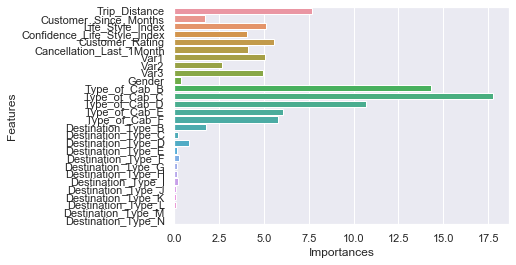

In [104]:
%%time

lgb_oofs, lgb_preds, feature_importance = cross_val(features, train_proc, test_proc, CatBoostClassifier(random_state = 1999), 'cat')
sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)

In [107]:
sample_sub[target] = lgb_preds
sample_sub.to_csv(path+'\\baseline_model_preds.csv', index = False)